In [1]:
!pip install cartopy

import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
from scipy.stats import genextreme
from scipy.stats import gumbel_r
import matplotlib.pyplot as plt
import glob
import os
import seaborn as sns
import xarray as xr
import cartopy as crt
import cartopy.crs as ccrs
import cartopy.feature as cftr
from scipy.stats import linregress
from datetime import datetime
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter, LatitudeLocator)

C:\Users\Nurul Nabila Fadiyah\anaconda3\lib\site-packages\xarray\backends\cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [2]:
cape_data            =xr.load_dataarray("D:\[4] SEMESTER 8\Bismillah TA\[7] Data Kondisi Atmosfer\cape_1121.nc")
cin_data             =xr.load_dataarray("D:\[4] SEMESTER 8\Bismillah TA\[7] Data Kondisi Atmosfer\cin_1121.nc")
kindex_data          =xr.load_dataarray("D:\[4] SEMESTER 8\Bismillah TA\[7] Data Kondisi Atmosfer\kindex_1121.nc")
specifichum_data     =xr.load_dataarray("D:\[4] SEMESTER 8\Bismillah TA\[7] Data Kondisi Atmosfer\specific_humidity1121.nc")

C:\Users\Nurul Nabila Fadiyah\anaconda3\lib\site-packages\xarray\backends\plugins.py:65: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
C:\Users\Nurul Nabila Fadiyah\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
relativehum_data     =xr.load_dataarray("D:\\[4] SEMESTER 8\\Bismillah TA\\[7] Data Kondisi Atmosfer\\relative_humidity1121.nc")
twv_data             =xr.load_dataarray("D:\\[4] SEMESTER 8\\Bismillah TA\\[7] Data Kondisi Atmosfer\\totalwatervapour_1121.nc")

In [4]:
windspeed_data       =xr.load_dataarray("D:\[4] SEMESTER 8\Bismillah TA\[7] Data Kondisi Atmosfer\windspeed.nc")
lls_data             =xr.load_dataarray("D:\[4] SEMESTER 8\Bismillah TA\[7] Data Kondisi Atmosfer\LLS_Sumatra.nc")
dls_data             =xr.load_dataarray("D:\[4] SEMESTER 8\Bismillah TA\[7] Data Kondisi Atmosfer\DLS_Sumatra.nc")

CAPE

In [5]:
# # Compute the mean value of the filtered data for each year
mean_data_cape = cape_data.groupby('time.year').mean(dim='time')
mean_data_cape

<xarray.DataArray 'cape' (year: 11, latitude: 49, longitude: 57)>
array([[[ 761.565  ,  713.1495 ,  699.64777, ...,  809.24603,
          813.4336 ,  818.6842 ],
        [ 723.6721 ,  673.81104,  643.8869 , ...,  819.67413,
          823.32007,  827.7832 ],
        [ 674.1272 ,  660.3316 ,  551.29376, ...,  831.7312 ,
          834.97455,  838.55835],
        ...,
        [ 421.297  ,  421.3428 ,  421.42593, ...,  612.09845,
          617.0222 ,  616.2329 ],
        [ 409.8776 ,  410.91202,  412.09317, ...,  588.5128 ,
          595.6896 ,  598.4641 ],
        [ 396.38657,  399.02582,  401.27356, ...,  555.258  ,
          554.9582 ,  562.00165]],

       [[ 816.67487,  770.8363 ,  759.3416 , ..., 1003.53424,
         1002.2695 , 1000.01196],
        [ 774.62976,  722.24536,  678.1261 , ..., 1017.1168 ,
         1013.7501 , 1010.33   ],
        [ 716.58826,  700.2402 ,  571.73694, ..., 1028.9806 ,
         1025.3079 , 1022.4575 ],
...
        [ 479.9688 ,  480.8647 ,  483.4614 , ...,  563.15674,
          568.90564,  571.6643 ],
        [ 463.61954,  464.64444,  466.51703, ...,  536.95746,
          544.1648 ,  550.00867],
        [ 445.9616 ,  446.82407,  448.18118, ...,  501.8939 ,
          502.56125,  512.737  ]],

       [[ 544.61487,  504.6847 ,  496.98746, ...,  698.23676,
          700.6046 ,  702.378  ],
        [ 515.6387 ,  499.78824,  494.7422 , ...,  702.68365,
          704.49255,  706.6546 ],
        [ 479.21918,  511.70456,  461.16776, ...,  712.7863 ,
          713.76294,  715.5191 ],
        ...,
        [ 420.41443,  421.49292,  422.35278, ...,  565.7218 ,
          570.23553,  569.04443],
        [ 409.63513,  409.86642,  410.21506, ...,  543.5868 ,
          549.9082 ,  552.78436],
        [ 400.66037,  401.05457,  400.7931 , ...,  512.3403 ,
          510.80536,  520.7732 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 95.0 95.25 95.5 95.75 ... 108.5 108.8 109.0
  * latitude   (latitude) float32 5.9 5.65 5.4 5.15 ... -5.35 -5.6 -5.85 -6.1
  * year       (year) int64 2011 2012 2013 2014 2015 ... 2018 2019 2020 2021

In [6]:
# get latitudes and longitudes
lats = mean_data_cape.latitude.values
lons = mean_data_cape.longitude.values

# Create an empty array with the desired shape
slope_cape_arr = np.zeros(shape=(len(lats), len(lons)))
slope_cape_arr[:]=np.nan

# Create the DataArray object with the array and coordinates
slope_cape = xr.DataArray(slope_cape_arr,
                          dims=['latitude', 'longitude'],
                          coords={'latitude': lats, 'longitude': lons})

# Create an empty array with the desired shape
p_values_arr = np.zeros(shape=(len(lats), len(lons)))
p_values_arr[:]=np.nan

# Create the DataArray object with the array and coordinates
p_values_cape = xr.DataArray(p_values_arr,
                          dims=['latitude', 'longitude'],
                          coords={'latitude': lats, 'longitude': lons})


In [7]:
from scipy.stats import linregress

for i in range (0,lats.size):
    for j in range (0,lons.size):
        y = mean_data_cape[:, i, j].values
        x = range(len(y))
        li=linregress(x, y)
        slope_cape[i, j]=li.slope
        p_values_cape[i, j]=li.pvalue

# # create new xarray dataset for slope and p-values
result_cape = xr.Dataset({
    'slope': slope_cape,
    'p_values': p_values_cape})

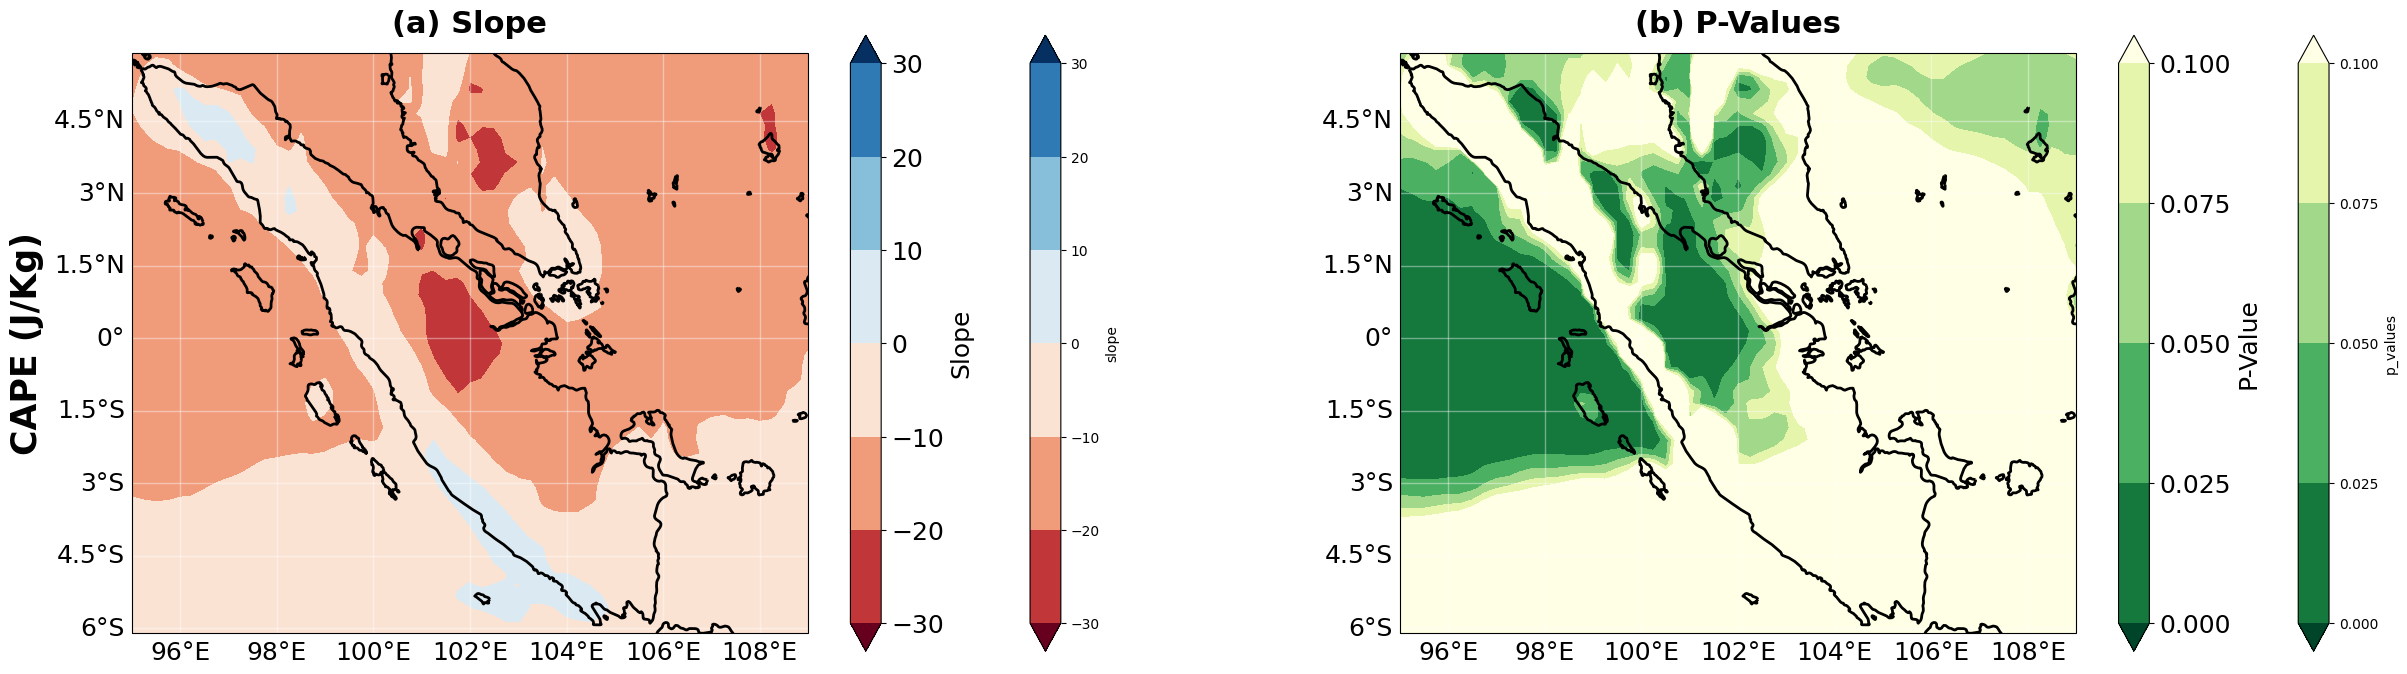

In [8]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(30,8), subplot_kw={'projection': ccrs.PlateCarree()})
# ax.coastlines('10m', linewidth=2, zorder=100)

mean_slope_cape = result_cape.slope.plot.contourf(ax=ax1,
                                                  transform=ccrs.PlateCarree(),
                                                  cmap='RdBu',
                                                  extend='both')

mean_pvalue_cape = result_cape.p_values.plot.contourf(ax=ax2,
                                                      transform=ccrs.PlateCarree(),
                                                      cmap='YlGn_r',
                                                      extend='both',
                                                      levels=np.linspace(0, 0.1, 5),
                                                      vmin=0,
                                                      vmax=0.1)

# Add color bars
cbar1 = plt.colorbar(mean_slope_cape, ax=ax1)
cbar2 = plt.colorbar(mean_pvalue_cape, ax=ax2)

# Set the font size for color bars
cbar1.ax.tick_params(labelsize=18)
cbar2.ax.tick_params(labelsize=18)

# Set the font size for color bar labels
cbar1.set_label('Slope', fontsize=18)
cbar2.set_label('P-Value', fontsize=18)

# Add a title and axis labels
ax1.set_title('(a) Slope', size=22, pad=15, fontweight='bold')
ax2.set_title('(b) P-Values', size=22, pad=15, fontweight='bold')

# Tambahkan label CAPE pada sumbu y
ax1.annotate('CAPE (J/Kg)', xy=(-0.18, 0.5), xycoords='axes fraction',
             rotation=90, va='center', fontsize=25, fontweight='bold')

# Add coastlines and gridlines
for ax in [ax1, ax2]:
    ax.coastlines('10m', lw=2, color='k', zorder=100)
    ax.add_feature(cftr.LAND, facecolor='white', zorder=0)

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='white', alpha=0.4)
    gl.top_labels = False
    gl.right_labels = False

    gl.ylocator = LatitudeLocator()
    gl.xformatter = LongitudeFormatter()
    gl.yformatter = LatitudeFormatter()

    gl.xlabel_style = {'size': 18, 'color': 'k'}
    gl.ylabel_style = {'color': 'k', 'size': 18}

plt.show()


CIN

In [9]:
# Compute the mean value of the filtered data for each year
mean_data_cin = cin_data.groupby('time.year').mean(dim='time')
mean_data_cin

<xarray.DataArray 'cin' (year: 11, latitude: 49, longitude: 57)>
array([[[117.55749 , 146.79814 , 162.39145 , ...,  90.18548 ,
          89.9999  ,  88.72708 ],
        [137.32292 , 172.89874 , 186.52751 , ...,  91.46537 ,
          90.61848 ,  90.34378 ],
        [146.32785 , 158.55753 , 165.81123 , ...,  91.21761 ,
          90.92886 ,  90.48414 ],
        ...,
        [104.86987 , 105.28794 , 104.508224, ..., 117.32018 ,
         111.806114, 110.91036 ],
        [101.64797 ,  99.96596 , 100.99345 , ..., 123.441414,
         117.93793 , 113.89312 ],
        [ 99.417885,  98.893166,  98.31275 , ..., 133.72824 ,
         123.94032 , 119.10598 ]],

       [[123.69563 , 149.29164 , 167.3558  , ...,  88.593056,
          87.9289  ,  87.52314 ],
        [139.72115 , 171.12378 , 189.71603 , ...,  89.433655,
          89.136345,  88.76651 ],
        [149.24892 , 154.49356 , 165.33519 , ...,  90.32476 ,
          90.26676 ,  89.38597 ],
...
        [ 91.43309 ,  91.68116 ,  90.94522 , ..., 116.36418 ,
         111.54472 , 110.30397 ],
        [ 92.668045,  92.21508 ,  92.55712 , ..., 126.69219 ,
         119.043076, 115.26364 ],
        [ 93.656136,  94.59294 ,  95.075775, ..., 140.39664 ,
         130.35132 , 122.50664 ]],

       [[138.13525 , 169.79659 , 189.81581 , ...,  96.710075,
          96.74811 ,  96.16727 ],
        [161.03867 , 190.60788 , 205.85806 , ...,  98.46652 ,
          98.66363 ,  97.935684],
        [170.77194 , 176.69681 , 176.48422 , ...,  99.653206,
          99.84638 ,  99.5081  ],
        ...,
        [ 95.65802 ,  95.88126 ,  96.38955 , ..., 117.205986,
         113.51213 , 113.26639 ],
        [ 93.99242 ,  94.880646,  95.47704 , ..., 124.75005 ,
         120.220726, 116.56308 ],
        [ 92.81878 ,  93.46419 ,  95.42083 , ..., 134.61589 ,
         126.989235, 122.812744]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 95.0 95.25 95.5 95.75 ... 108.5 108.8 109.0
  * latitude   (latitude) float32 5.9 5.65 5.4 5.15 ... -5.35 -5.6 -5.85 -6.1
  * year       (year) int64 2011 2012 2013 2014 2015 ... 2018 2019 2020 2021

In [10]:
# get latitudes and longitudes
lats = mean_data_cin.latitude.values
lons = mean_data_cin.longitude.values

# Create an empty array with the desired shape
slope_cin_arr = np.zeros(shape=(len(lats), len(lons)))
slope_cin_arr[:]=np.nan

# Create the DataArray object with the array and coordinates
slope_cin = xr.DataArray(slope_cin_arr,
                          dims=['latitude', 'longitude'],
                          coords={'latitude': lats, 'longitude': lons})

# Create an empty array with the desired shape
p_values_arr = np.zeros(shape=(len(lats), len(lons)))
p_values_arr[:]=np.nan

# Create the DataArray object with the array and coordinates
p_values_cin = xr.DataArray(p_values_arr,
                          dims=['latitude', 'longitude'],
                          coords={'latitude': lats, 'longitude': lons})

In [11]:
from scipy.stats import linregress

for i in range (0,lats.size):
    for j in range (0,lons.size):
        y = mean_data_cin[:, i, j].values
        x = range(len(y))
        li=linregress(x, y)
        slope_cin[i, j]=li.slope
        p_values_cin[i, j]=li.pvalue

# # create new xarray dataset for slope and p-values
result_cin = xr.Dataset({
    'slope': slope_cin,
    'p_values': p_values_cin})

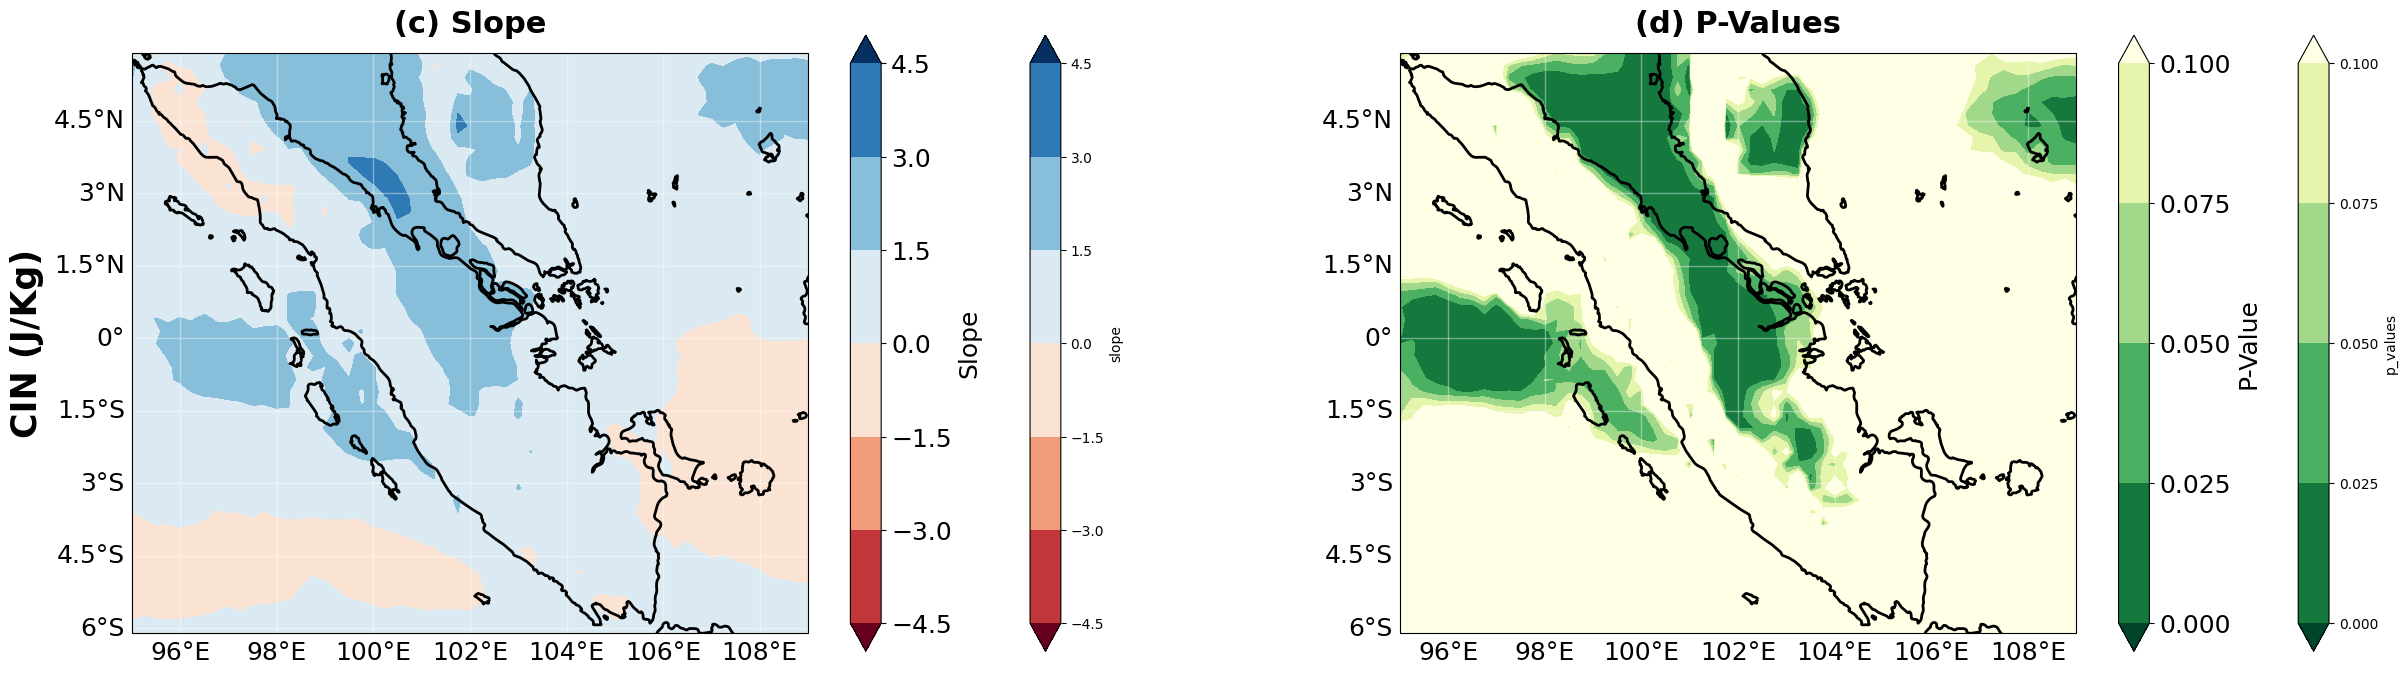

In [12]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(30,8), subplot_kw={'projection': ccrs.PlateCarree()})
# ax.coastlines('10m', linewidth=2, zorder=100)

mean_slope_cin = result_cin.slope.plot.contourf(ax=ax1,
            transform=ccrs.PlateCarree(),
            cmap='RdBu',
            extend='both')

mean_pvalue_cin = result_cin.p_values.plot.contourf(ax=ax2,
            transform=ccrs.PlateCarree(),
            cmap='YlGn_r',
            extend='both',
            levels=np.linspace(0, 0.1, 5),  # Set levels from 0 to 0.1 with 11 levels
            vmin=0,  # Set vmin to 0
            vmax=0.1)  # Set vmax to 0.1)

# Add color bars
cbar1 = plt.colorbar(mean_slope_cin, ax=ax1)
cbar2 = plt.colorbar(mean_pvalue_cin, ax=ax2)

# Set the font size for color bars
cbar1.ax.tick_params(labelsize=18)
cbar2.ax.tick_params(labelsize=18)

# Set the font size for color bar labels
cbar1.set_label('Slope', fontsize=18)
cbar2.set_label('P-Value', fontsize=18)

# Add a title and axis labels
ax1.set_title('(c) Slope', size=22, pad=15, fontweight='bold')
ax2.set_title('(d) P-Values', size=22, pad=15, fontweight='bold')

# Tambahkan label CAPE pada sumbu y
ax1.annotate('CIN (J/Kg)', xy=(-0.18, 0.5), xycoords='axes fraction',
             rotation=90, va='center', fontsize=25, fontweight='bold')

# Add coastlines and gridlines
for ax in [ax1, ax2]:
    ax.coastlines('10m', lw=2, color='k', zorder=100)
    ax.add_feature(cftr.LAND,facecolor='white', zorder=0)

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='white',alpha=0.4)
    gl.top_labels = False
    gl.right_labels = False

    gl.ylocator = LatitudeLocator()
    gl.xformatter = LongitudeFormatter()
    gl.yformatter = LatitudeFormatter()

    gl.xlabel_style = {'size': 18, 'color': 'k'}#, 'rotation':45}
    gl.ylabel_style = {'color': 'k',  'size':18}

plt.show()

K index

In [8]:
# Compute the mean value of the filtered data for each year
mean_data_kindex = kindex_data.groupby('time.year').mean(dim='time')
mean_data_kindex

<xarray.DataArray 'kx' (year: 11, latitude: 49, longitude: 57)>
array([[[31.211412, 31.195972, 31.292854, ..., 31.872824, 31.937078,
         31.987633],
        [31.24167 , 30.88035 , 30.825867, ..., 31.973734, 32.035954,
         32.08473 ],
        [31.289373, 30.337585, 29.524792, ..., 32.08463 , 32.144   ,
         32.189354],
        ...,
        [28.721386, 28.683462, 28.651953, ..., 29.453325, 29.406254,
         29.32082 ],
        [28.534912, 28.504168, 28.459337, ..., 29.423933, 29.429699,
         29.401094],
        [28.300137, 28.271915, 28.236496, ..., 29.367407, 29.38187 ,
         29.422192]],

       [[31.158772, 31.112417, 31.183943, ..., 32.272118, 32.322556,
         32.355103],
        [31.214033, 30.76709 , 30.678442, ..., 32.328457, 32.356716,
         32.37502 ],
        [31.278906, 30.17301 , 29.302372, ..., 32.36245 , 32.376644,
         32.374508],
...
        [32.209797, 32.21942 , 32.229816, ..., 31.373108, 31.317423,
         31.277603],
        [32.024303, 32.037766, 32.04023 , ..., 31.472336, 31.439705,
         31.401138],
        [31.80034 , 31.816288, 31.830061, ..., 31.616095, 31.564436,
         31.547771]],

       [[30.396803, 30.389452, 30.450464, ..., 30.66341 , 30.724468,
         30.768711],
        [30.680433, 30.329538, 30.186958, ..., 30.70843 , 30.754066,
         30.786608],
        [30.961166, 29.986748, 29.022598, ..., 30.800335, 30.834974,
         30.847532],
        ...,
        [31.938517, 31.913403, 31.878414, ..., 31.509706, 31.455313,
         31.409946],
        [31.852661, 31.826298, 31.781746, ..., 31.55188 , 31.518528,
         31.479435],
        [31.77247 , 31.743204, 31.697416, ..., 31.629189, 31.58368 ,
         31.56627 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 95.0 95.25 95.5 95.75 ... 108.5 108.8 109.0
  * latitude   (latitude) float32 5.9 5.65 5.4 5.15 ... -5.35 -5.6 -5.85 -6.1
  * year       (year) int64 2011 2012 2013 2014 2015 ... 2018 2019 2020 2021

In [9]:
# get latitudes and longitudes
lats = mean_data_kindex.latitude.values
lons = mean_data_kindex.longitude.values

# Create an empty array with the desired shape
slope_kindex_arr = np.zeros(shape=(len(lats), len(lons)))
slope_kindex_arr[:]=np.nan

# Create the DataArray object with the array and coordinates
slope_kindex = xr.DataArray(slope_kindex_arr,
                          dims=['latitude', 'longitude'],
                          coords={'latitude': lats, 'longitude': lons})

# Create an empty array with the desired shape
p_values_arr = np.zeros(shape=(len(lats), len(lons)))
p_values_arr[:]=np.nan

# Create the DataArray object with the array and coordinates
p_values_kindex = xr.DataArray(p_values_arr,
                          dims=['latitude', 'longitude'],
                          coords={'latitude': lats, 'longitude': lons})

In [10]:
from scipy.stats import linregress

for i in range (0,lats.size):
    for j in range (0,lons.size):
        y = mean_data_kindex[:, i, j].values
        x = range(len(y))
        li=linregress(x, y)
        slope_kindex[i, j]=li.slope
        p_values_kindex[i, j]=li.pvalue

# # create new xarray dataset for slope and p-values
result_kindex = xr.Dataset({
    'slope': slope_kindex,
    'p_values': p_values_kindex})

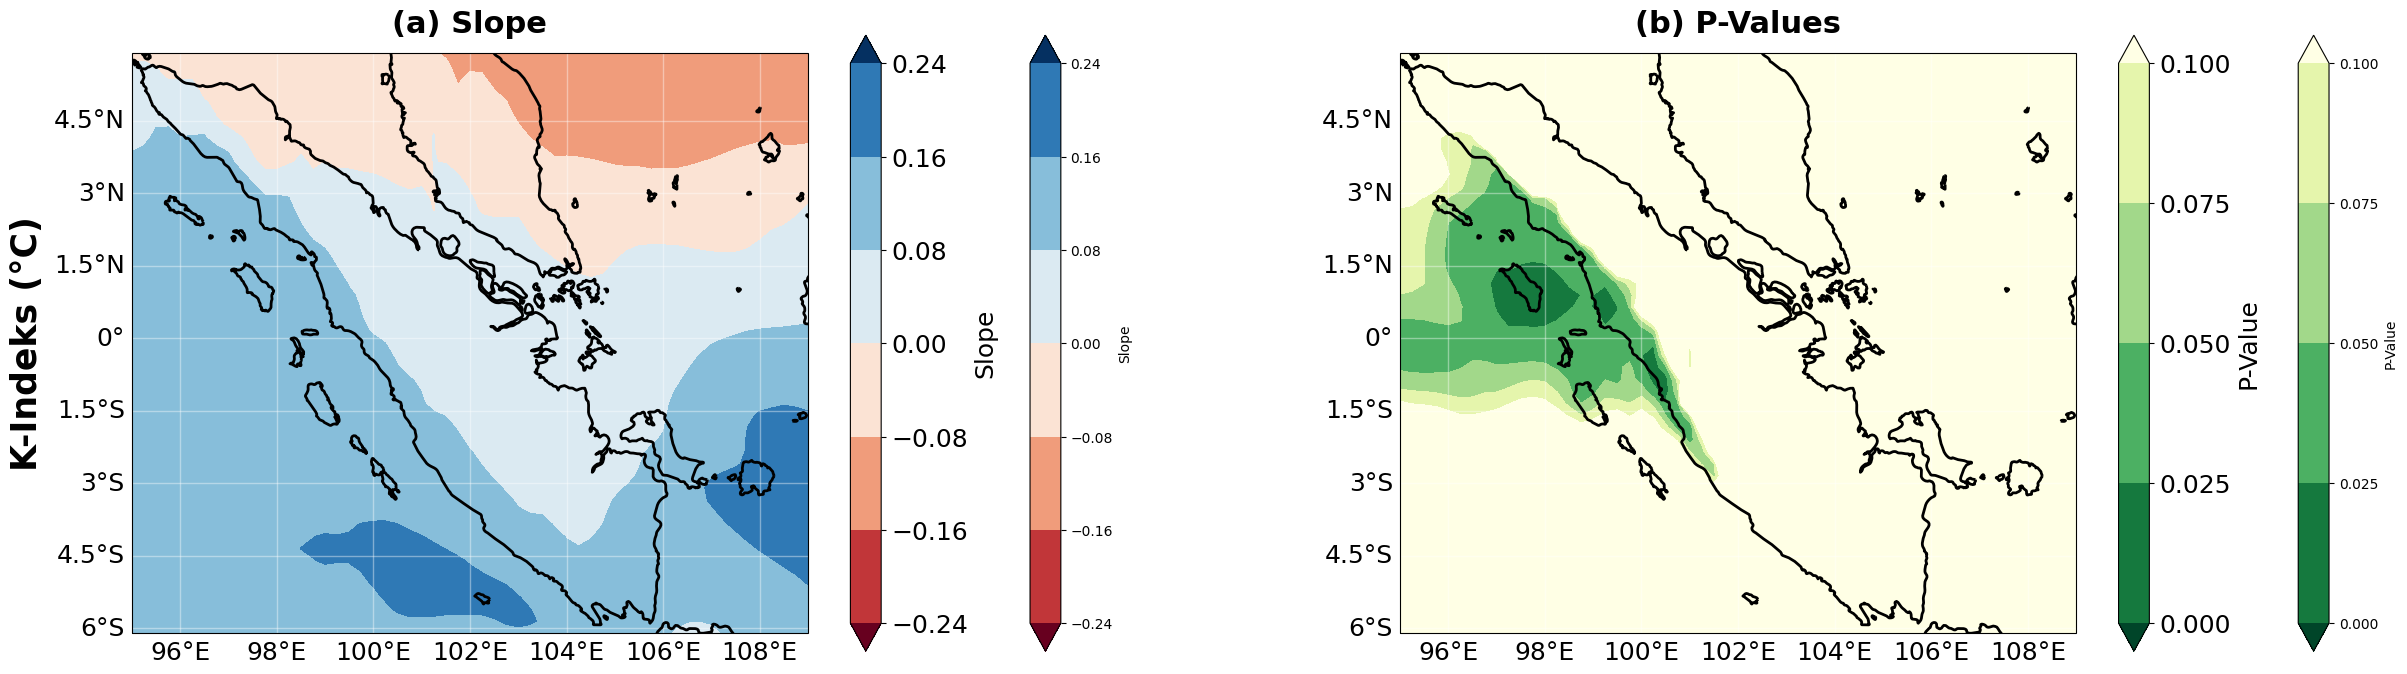

In [11]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(30,8), subplot_kw={'projection': ccrs.PlateCarree()})
# ax.coastlines('10m', linewidth=2, zorder=100)

mean_slope_kindex = result_kindex.slope.plot.contourf(ax=ax1,
            transform=ccrs.PlateCarree(),
            cmap='RdBu',
            extend='both',
            cbar_kwargs={'label': 'Slope'})

mean_pvalue_kindex = result_kindex.p_values.plot.contourf(ax=ax2,
            transform=ccrs.PlateCarree(),
            cmap='YlGn_r',
            extend='both',
            cbar_kwargs={'label': 'P-Value'},
            levels=np.linspace(0, 0.1, 5),  # Set levels from 0 to 0.1 with 11 levels
            vmin=0,  # Set vmin to 0
            vmax=0.1)  # Set vmax to 0.1)

# Add color bars
cbar1 = plt.colorbar(mean_slope_kindex, ax=ax1)
cbar2 = plt.colorbar(mean_pvalue_kindex, ax=ax2)

# Set the font size for color bars
cbar1.ax.tick_params(labelsize=18)
cbar2.ax.tick_params(labelsize=18)

# Set the font size for color bar labels
cbar1.set_label('Slope', fontsize=18)
cbar2.set_label('P-Value', fontsize=18)

# Add a title and axis labels
ax1.set_title('(a) Slope', size=22, pad=15, fontweight='bold')
ax2.set_title('(b) P-Values', size=22, pad=15, fontweight='bold')

# Tambahkan label Kindex pada sumbu y
ax1.annotate('K-Indeks (°C)', xy=(-0.18, 0.5), xycoords='axes fraction',
             rotation=90, va='center', fontsize=25, fontweight='bold')

# Add coastlines and gridlines
for ax in [ax1, ax2]:
    ax.coastlines('10m', lw=2, color='k', zorder=100)
    ax.add_feature(cftr.LAND,facecolor='white', zorder=0)

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='white',alpha=0.4)
    gl.top_labels = False
    gl.right_labels = False

    gl.ylocator = LatitudeLocator()
    gl.xformatter = LongitudeFormatter()
    gl.yformatter = LatitudeFormatter()

    gl.xlabel_style = {'size': 18, 'color': 'k'}#, 'rotation':45}
    gl.ylabel_style = {'color': 'k',  'size':18}

plt.show()

Jumlah Total Uap Air

In [12]:
# Compute the mean value of the filtered data for each year
mean_data_twv = twv_data.groupby('time.year').mean(dim='time')
mean_data_twv

<xarray.DataArray 'tcwv' (year: 11, latitude: 49, longitude: 57)>
array([[[52.314697, 52.04774 , 51.997223, ..., 53.230293, 53.308212,
         53.37076 ],
        [52.304108, 51.04742 , 50.39903 , ..., 53.34484 , 53.412064,
         53.47215 ],
        [52.35323 , 49.470566, 46.74874 , ..., 53.461285, 53.53454 ,
         53.57518 ],
        ...,
        [49.472626, 49.459522, 49.450138, ..., 49.883713, 49.844353,
         49.801544],
        [49.280643, 49.28192 , 49.264965, ..., 49.774292, 49.827885,
         49.8747  ],
        [49.075573, 49.071014, 49.067593, ..., 49.59314 , 49.67753 ,
         49.857323]],

       [[52.15043 , 51.820503, 51.720497, ..., 53.094963, 53.162594,
         53.207485],
        [52.17164 , 50.809036, 50.093464, ..., 53.16847 , 53.21829 ,
         53.261044],
        [52.240765, 49.233162, 46.460808, ..., 53.252354, 53.312946,
         53.344833],
...
        [55.034504, 55.05854 , 55.07576 , ..., 53.387   , 53.30613 ,
         53.237297],
        [54.78963 , 54.824604, 54.832832, ..., 53.345375, 53.330524,
         53.29884 ],
        [54.511864, 54.533184, 54.556583, ..., 53.31747 , 53.29458 ,
         53.348217]],

       [[52.65182 , 52.345203, 52.207603, ..., 52.75319 , 52.83484 ,
         52.90158 ],
        [52.815723, 51.53402 , 50.785698, ..., 52.803394, 52.86058 ,
         52.92505 ],
        [52.99298 , 50.092644, 47.290127, ..., 52.87858 , 52.94105 ,
         52.98992 ],
        ...,
        [53.791   , 53.790936, 53.785427, ..., 52.63823 , 52.578968,
         52.521976],
        [53.72955 , 53.73958 , 53.723465, ..., 52.610832, 52.616463,
         52.59784 ],
        [53.64701 , 53.645107, 53.638493, ..., 52.575687, 52.582573,
         52.65257 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 95.0 95.25 95.5 95.75 ... 108.5 108.8 109.0
  * latitude   (latitude) float32 5.9 5.65 5.4 5.15 ... -5.35 -5.6 -5.85 -6.1
  * year       (year) int64 2011 2012 2013 2014 2015 ... 2018 2019 2020 2021

In [13]:
# get latitudes and longitudes
lats = mean_data_twv.latitude.values
lons = mean_data_twv.longitude.values

# Create an empty array with the desired shape
slope_twv_arr = np.zeros(shape=(len(lats), len(lons)))
slope_twv_arr[:]=np.nan

# Create the DataArray object with the array and coordinates
slope_twv = xr.DataArray(slope_twv_arr,
                          dims=['latitude', 'longitude'],
                          coords={'latitude': lats, 'longitude': lons})

# Create an empty array with the desired shape
p_values_arr = np.zeros(shape=(len(lats), len(lons)))
p_values_arr[:]=np.nan

# Create the DataArray object with the array and coordinates
p_values_twv = xr.DataArray(p_values_arr,
                          dims=['latitude', 'longitude'],
                          coords={'latitude': lats, 'longitude': lons})

In [14]:
from scipy.stats import linregress

for i in range (0,lats.size):
    for j in range (0,lons.size):
        y = mean_data_twv[:, i, j].values
        x = range(len(y))
        li=linregress(x, y)
        slope_twv[i, j]=li.slope
        p_values_twv[i, j]=li.pvalue

# # create new xarray dataset for slope and p-values
result_twv = xr.Dataset({
    'slope': slope_twv,
    'p_values': p_values_twv})

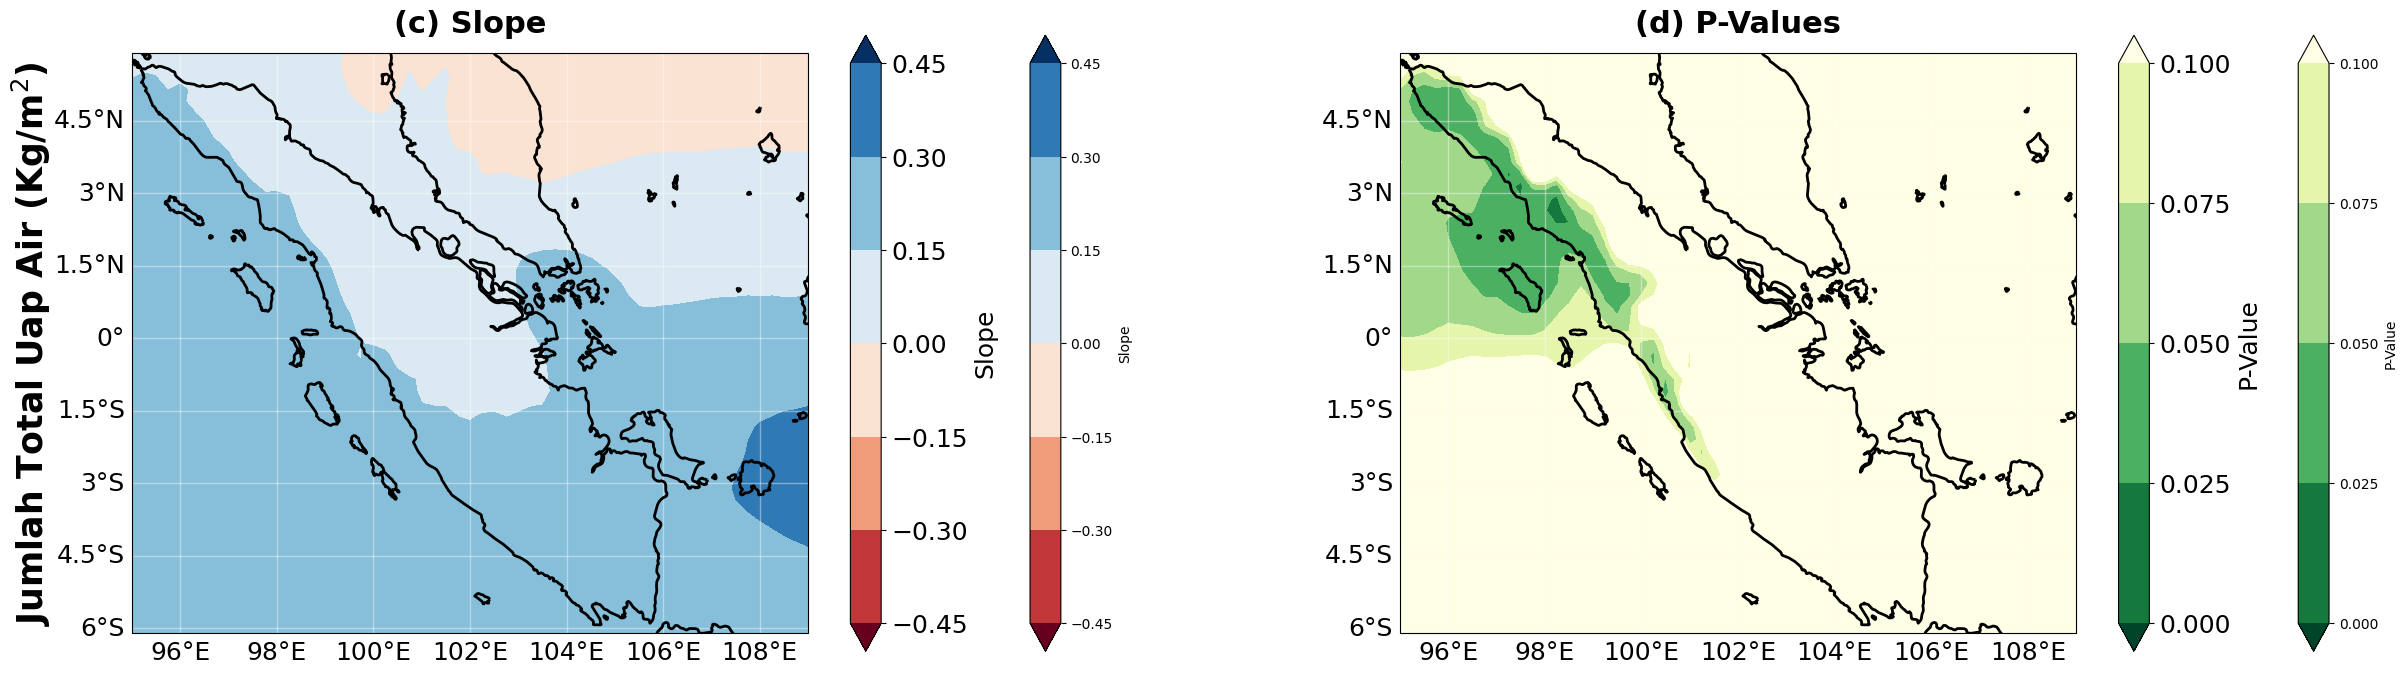

In [15]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(30,8), subplot_kw={'projection': ccrs.PlateCarree()})
# ax.coastlines('10m', linewidth=2, zorder=100)

mean_slope_twv = result_twv.slope.plot.contourf(ax=ax1,
            transform=ccrs.PlateCarree(),
            cmap='RdBu',
            extend='both',
            cbar_kwargs={'label': 'Slope'})

mean_pvalue_twv = result_twv.p_values.plot.contourf(ax=ax2,
            transform=ccrs.PlateCarree(),
            cmap='YlGn_r',
            extend='both',
            cbar_kwargs={'label': 'P-Value'},
            levels=np.linspace(0, 0.1, 5),  # Set levels from 0 to 0.1 with 11 levels
            vmin=0,  # Set vmin to 0
            vmax=0.1)  # Set vmax to 0.1)

# Add color bars
cbar1 = plt.colorbar(mean_slope_twv, ax=ax1)
cbar2 = plt.colorbar(mean_pvalue_twv, ax=ax2)

# Set the font size for color bars
cbar1.ax.tick_params(labelsize=18)
cbar2.ax.tick_params(labelsize=18)

# Set the font size for color bar labels
cbar1.set_label('Slope', fontsize=18)
cbar2.set_label('P-Value', fontsize=18)

# Add a title and axis labels
ax1.set_title('(c) Slope', size=22, pad=15, fontweight='bold')
ax2.set_title('(d) P-Values', size=22, pad=15, fontweight='bold')

# Tambahkan label Kindex pada sumbu y
ax1.annotate('Jumlah Total Uap Air (Kg/m$^2$)', xy=(-0.18, 0.5), xycoords='axes fraction',
             rotation=90, va='center', fontsize=25, fontweight='bold')


# Add coastlines and gridlines
for ax in [ax1, ax2]:
    ax.coastlines('10m', lw=2, color='k', zorder=100)
    ax.add_feature(cftr.LAND,facecolor='white', zorder=0)

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='white',alpha=0.4)
    gl.top_labels = False
    gl.right_labels = False

    gl.ylocator = LatitudeLocator()
    gl.xformatter = LongitudeFormatter()
    gl.yformatter = LatitudeFormatter()

    gl.xlabel_style = {'size': 18, 'color': 'k'}#, 'rotation':45}
    gl.ylabel_style = {'color': 'k',  'size':18}

plt.show()

Kelembapan Spesifik

In [16]:
# Compute the mean value of the filtered data for each year
mean_data_sh = specifichum_data.groupby('time.year').mean(dim='time')
mean_data_sh

<xarray.DataArray 'q' (year: 11, latitude: 49, longitude: 57)>
array([[[0.00708475, 0.00710824, 0.00712926, ..., 0.00736656,
         0.00737821, 0.00738704],
        [0.00707999, 0.00711864, 0.00716274, ..., 0.0073785 ,
         0.00739172, 0.00740026],
        [0.00708405, 0.00716271, 0.00725964, ..., 0.00739601,
         0.0074051 , 0.00741523],
        ...,
        [0.00662684, 0.00662734, 0.00663092, ..., 0.00658347,
         0.00656388, 0.00653636],
        [0.00658523, 0.00658533, 0.00658572, ..., 0.00657697,
         0.00656328, 0.00654292],
        [0.00653711, 0.00653552, 0.00653439, ..., 0.00656335,
         0.00655306, 0.00653761]],

       [[0.00708375, 0.00709376, 0.00710142, ..., 0.00740274,
         0.00741722, 0.00742812],
        [0.00708979, 0.00710904, 0.00713438, ..., 0.00742748,
         0.00743634, 0.00744073],
        [0.00710262, 0.00716103, 0.00723356, ..., 0.00744791,
         0.00744966, 0.00744628],
...
        [0.00755141, 0.00755974, 0.00756713, ..., 0.00745784,
         0.00744655, 0.00743172],
        [0.00748091, 0.00749153, 0.00750216, ..., 0.00747791,
         0.00746612, 0.00744866],
        [0.00740293, 0.00741435, 0.0074286 , ..., 0.00750424,
         0.00749625, 0.00747537]],

       [[0.00712635, 0.00713608, 0.00714202, ..., 0.00724391,
         0.00725704, 0.00726701],
        [0.00718042, 0.00721146, 0.00723012, ..., 0.00724935,
         0.00725702, 0.00726457],
        [0.00723963, 0.00731615, 0.00736611, ..., 0.00726554,
         0.00726721, 0.00727226],
        ...,
        [0.00746402, 0.00745834, 0.00745326, ..., 0.00728785,
         0.00728875, 0.007285  ],
        [0.00743954, 0.00743019, 0.00742141, ..., 0.00727918,
         0.00728068, 0.0072768 ],
        [0.00739994, 0.00738674, 0.00737651, ..., 0.00727609,
         0.00728156, 0.00727488]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 95.0 95.25 95.5 95.75 ... 108.5 108.8 109.0
  * latitude   (latitude) float32 5.9 5.65 5.4 5.15 ... -5.35 -5.6 -5.85 -6.1
  * year       (year) int64 2011 2012 2013 2014 2015 ... 2018 2019 2020 2021

In [17]:
# get latitudes and longitudes
lats = mean_data_sh.latitude.values
lons = mean_data_sh.longitude.values

# Create an empty array with the desired shape
slope_sh_arr = np.zeros(shape=(len(lats), len(lons)))
slope_sh_arr[:]=np.nan

# Create the DataArray object with the array and coordinates
slope_sh = xr.DataArray(slope_sh_arr,
                          dims=['latitude', 'longitude'],
                          coords={'latitude': lats, 'longitude': lons})

# Create an empty array with the desired shape
p_values_arr = np.zeros(shape=(len(lats), len(lons)))
p_values_arr[:]=np.nan

# Create the DataArray object with the array and coordinates
p_values_sh = xr.DataArray(p_values_arr,
                          dims=['latitude', 'longitude'],
                          coords={'latitude': lats, 'longitude': lons})

In [18]:
from scipy.stats import linregress

for i in range (0,lats.size):
    for j in range (0,lons.size):
        y = mean_data_sh[:, i, j].values
        x = range(len(y))
        li=linregress(x, y)
        slope_sh[i, j]=li.slope
        p_values_sh[i, j]=li.pvalue

# # create new xarray dataset for slope and p-values
result_sh = xr.Dataset({
    'slope': slope_sh,
    'p_values': p_values_sh})

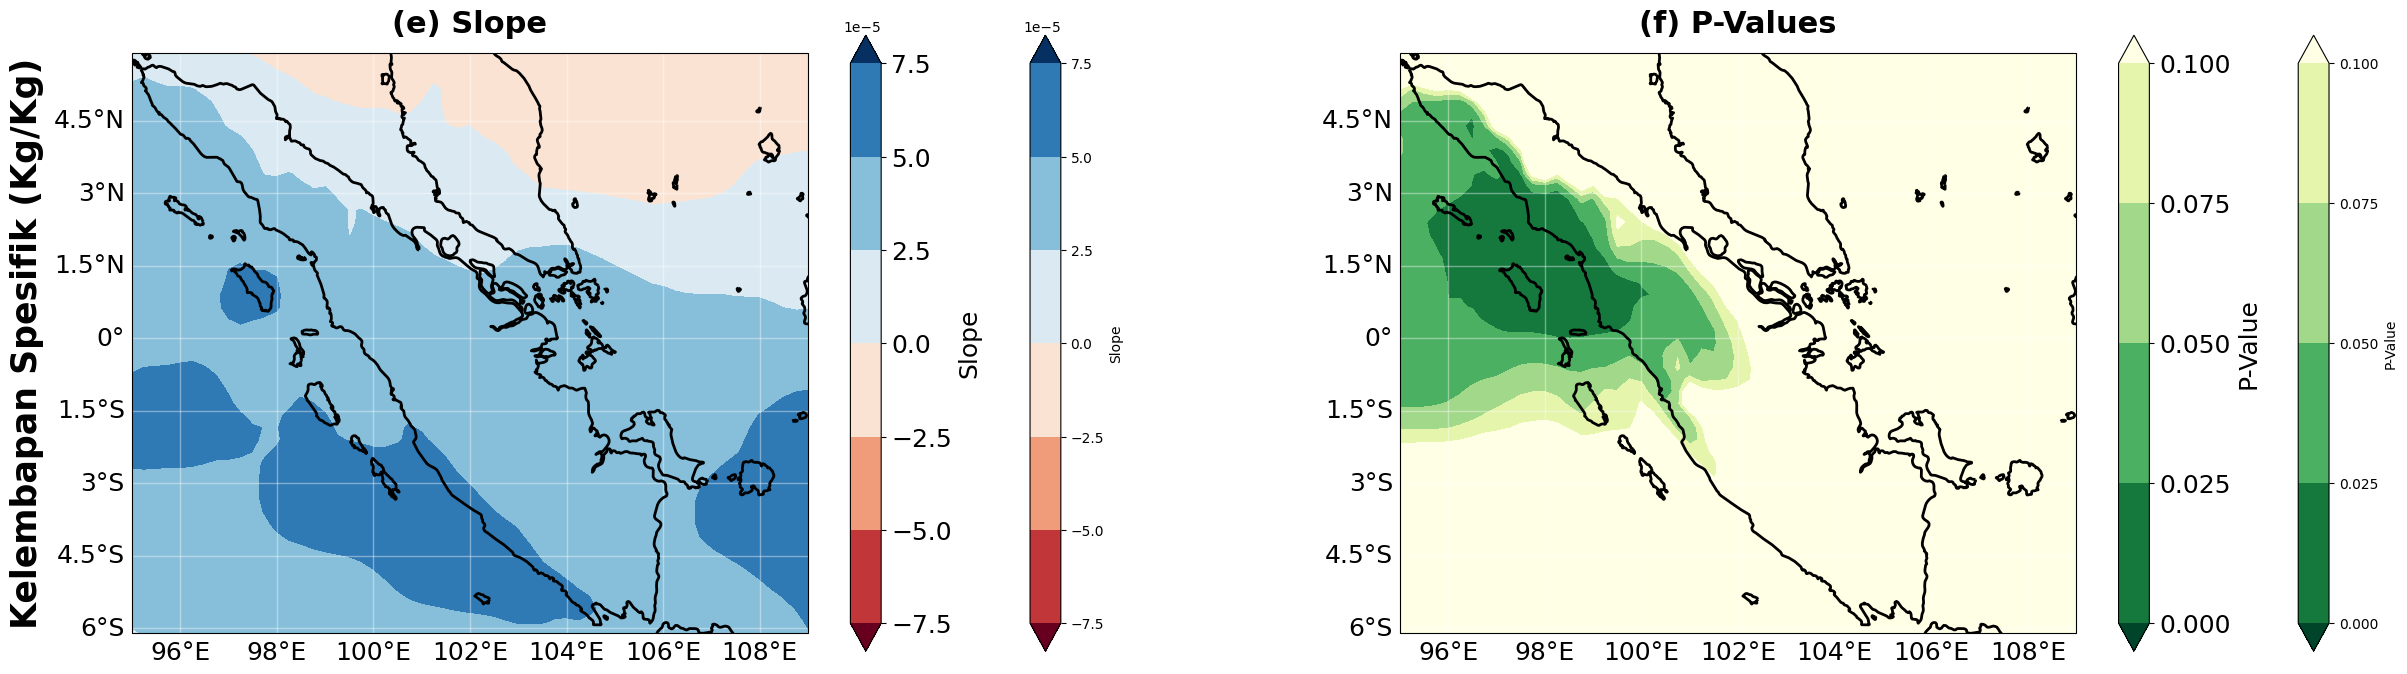

In [19]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(30,8), subplot_kw={'projection': ccrs.PlateCarree()})
# ax.coastlines('10m', linewidth=2, zorder=100)

mean_slope_sh = result_sh.slope.plot.contourf(ax=ax1,
            transform=ccrs.PlateCarree(),
            cmap='RdBu',
            extend='both',
            cbar_kwargs={'label': 'Slope'})

mean_pvalue_sh = result_sh.p_values.plot.contourf(ax=ax2,
            transform=ccrs.PlateCarree(),
            cmap='YlGn_r',
            extend='both',
            cbar_kwargs={'label': 'P-Value'},
            levels=np.linspace(0, 0.1, 5),  # Set levels from 0 to 0.1 with 11 levels
            vmin=0,  # Set vmin to 0
            vmax=0.1)  # Set vmax to 0.1)

# Add color bars
cbar1 = plt.colorbar(mean_slope_sh, ax=ax1)
cbar2 = plt.colorbar(mean_pvalue_sh, ax=ax2)

# Set the font size for color bars
cbar1.ax.tick_params(labelsize=18)
cbar2.ax.tick_params(labelsize=18)

# Set the font size for color bar labels
cbar1.set_label('Slope', fontsize=18)
cbar2.set_label('P-Value', fontsize=18)

# Add a title and axis labels
ax1.set_title('(e) Slope', size=22, pad=15, fontweight='bold')
ax2.set_title('(f) P-Values', size=22, pad=15, fontweight='bold')

# Tambahkan label Kindex pada sumbu y
ax1.annotate('Kelembapan Spesifik (Kg/Kg)', xy=(-0.18, 0.5), xycoords='axes fraction',
             rotation=90, va='center', fontsize=25, fontweight='bold')

# Add coastlines and gridlines
for ax in [ax1, ax2]:
    ax.coastlines('10m', lw=2, color='k', zorder=100)
    ax.add_feature(cftr.LAND,facecolor='white', zorder=0)

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='white',alpha=0.4)
    gl.top_labels = False
    gl.right_labels = False

    gl.ylocator = LatitudeLocator()
    gl.xformatter = LongitudeFormatter()
    gl.yformatter = LatitudeFormatter()

    gl.xlabel_style = {'size': 18, 'color': 'k'}#, 'rotation':45}
    gl.ylabel_style = {'color': 'k',  'size':18}

plt.show()

Kelembapan Relatif

In [20]:
# Compute the mean value of the filtered data for each year
mean_data_rh = relativehum_data.groupby('time.year').mean(dim='time')
mean_data_rh

<xarray.DataArray 'r' (year: 11, latitude: 49, longitude: 57)>
array([[[67.69187 , 67.93421 , 68.22912 , ..., 69.45894 , 69.559166,
         69.64969 ],
        [67.72817 , 68.05555 , 68.737885, ..., 69.62548 , 69.74046 ,
         69.82511 ],
        [67.82788 , 68.475296, 69.864006, ..., 69.833244, 69.91886 ,
         70.01445 ],
        ...,
        [62.557663, 62.536636, 62.588108, ..., 62.27879 , 62.07739 ,
         61.795464],
        [62.093224, 62.06446 , 62.078026, ..., 62.197124, 62.042282,
         61.829807],
        [61.566902, 61.55896 , 61.528397, ..., 62.06291 , 61.950672,
         61.866875]],

       [[67.501015, 67.570114, 67.703476, ..., 69.96519 , 70.05354 ,
         70.164856],
        [67.64583 , 67.76158 , 68.24272 , ..., 70.270134, 70.32098 ,
         70.34387 ],
        [67.830154, 68.27323 , 69.41634 , ..., 70.54147 , 70.51991 ,
         70.461006],
...
        [68.63698 , 68.69686 , 68.76873 , ..., 68.1787  , 68.09071 ,
         67.894264],
        [67.916435, 68.00961 , 68.096275, ..., 68.37821 , 68.24643 ,
         68.052505],
        [67.121956, 67.25768 , 67.3608  , ..., 68.64287 , 68.53141 ,
         68.37255 ]],

       [[66.49351 , 66.62532 , 66.74437 , ..., 67.069374, 67.15683 ,
         67.231804],
        [67.04256 , 67.377625, 67.74911 , ..., 67.17622 , 67.22695 ,
         67.271996],
        [67.63777 , 68.37378 , 69.22214 , ..., 67.39207 , 67.38373 ,
         67.397934],
        ...,
        [69.480415, 69.42746 , 69.38928 , ..., 68.11674 , 68.14945 ,
         68.08619 ],
        [69.21833 , 69.129295, 69.048134, ..., 67.99657 , 67.99991 ,
         67.96588 ],
        [68.80556 , 68.70563 , 68.58468 , ..., 67.92934 , 67.962425,
         68.00392 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 95.0 95.25 95.5 95.75 ... 108.5 108.8 109.0
  * latitude   (latitude) float32 5.9 5.65 5.4 5.15 ... -5.35 -5.6 -5.85 -6.1
  * year       (year) int64 2011 2012 2013 2014 2015 ... 2018 2019 2020 2021

In [21]:
# get latitudes and longitudes
lats = mean_data_rh.latitude.values
lons = mean_data_rh.longitude.values

# Create an empty array with the desired shape
slope_rh_arr = np.zeros(shape=(len(lats), len(lons)))
slope_rh_arr[:]=np.nan

# Create the DataArray object with the array and coordinates
slope_rh = xr.DataArray(slope_rh_arr,
                          dims=['latitude', 'longitude'],
                          coords={'latitude': lats, 'longitude': lons})

# Create an empty array with the desired shape
p_values_arr = np.zeros(shape=(len(lats), len(lons)))
p_values_arr[:]=np.nan

# Create the DataArray object with the array and coordinates
p_values_rh = xr.DataArray(p_values_arr,
                          dims=['latitude', 'longitude'],
                          coords={'latitude': lats, 'longitude': lons})

In [22]:
from scipy.stats import linregress

for i in range (0,lats.size):
    for j in range (0,lons.size):
        y = mean_data_rh[:, i, j].values
        x = range(len(y))
        li=linregress(x, y)
        slope_rh[i, j]=li.slope
        p_values_rh[i, j]=li.pvalue

# # create new xarray dataset for slope and p-values
result_rh = xr.Dataset({
    'slope': slope_rh,
    'p_values': p_values_rh})

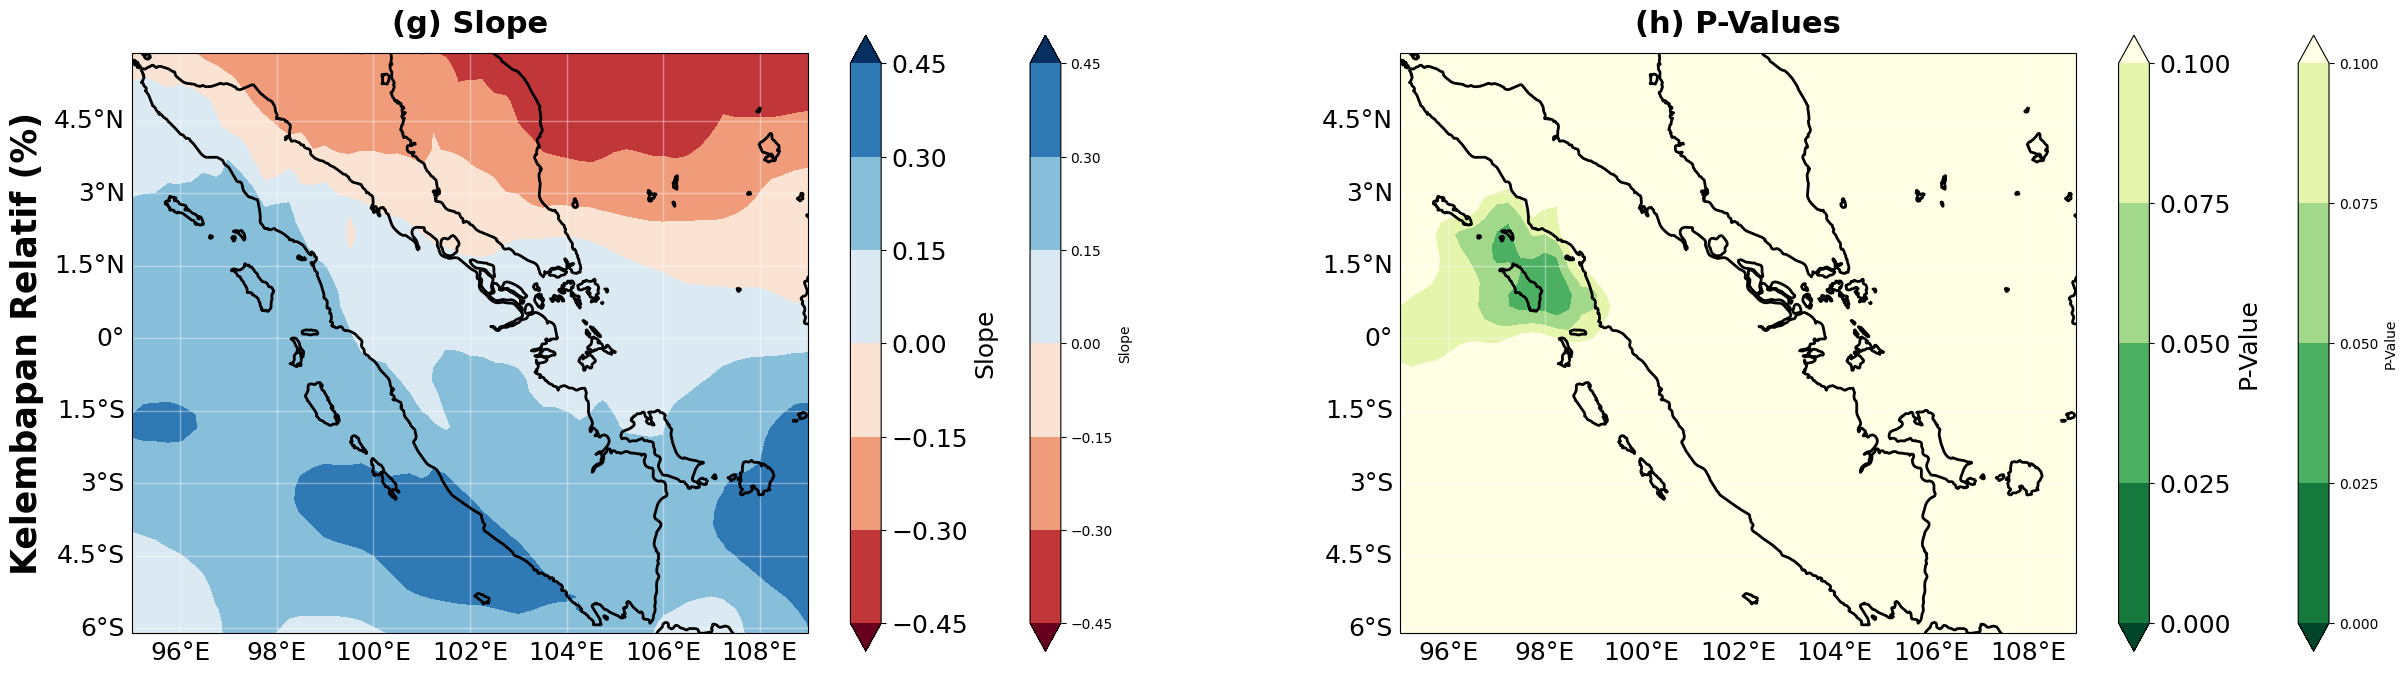

In [23]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(30,8), subplot_kw={'projection': ccrs.PlateCarree()})
# ax.coastlines('10m', linewidth=2, zorder=100)

mean_slope_rh = result_rh.slope.plot.contourf(ax=ax1,
            transform=ccrs.PlateCarree(),
            cmap='RdBu',
            extend='both',
            cbar_kwargs={'label': 'Slope'})

mean_pvalue_rh = result_rh.p_values.plot.contourf(ax=ax2,
            transform=ccrs.PlateCarree(),
            cmap='YlGn_r',
            extend='both',
            cbar_kwargs={'label': 'P-Value'},
            levels=np.linspace(0, 0.1, 5),  # Set levels from 0 to 0.1 with 11 levels
            vmin=0,  # Set vmin to 0
            vmax=0.1)  # Set vmax to 0.1)

# Add color bars
cbar1 = plt.colorbar(mean_slope_rh, ax=ax1)
cbar2 = plt.colorbar(mean_pvalue_rh, ax=ax2)

# Set the font size for color bars
cbar1.ax.tick_params(labelsize=18)
cbar2.ax.tick_params(labelsize=18)

# Set the font size for color bar labels
cbar1.set_label('Slope', fontsize=18)
cbar2.set_label('P-Value', fontsize=18)

# Add a title and axis labels
ax1.set_title('(g) Slope', size=22, pad=15, fontweight='bold')
ax2.set_title('(h) P-Values', size=22, pad=15, fontweight='bold')

# Tambahkan label Kindex pada sumbu y
ax1.annotate('Kelembapan Relatif (%)', xy=(-0.18, 0.5), xycoords='axes fraction',
             rotation=90, va='center', fontsize=25, fontweight='bold')

# Add coastlines and gridlines
for ax in [ax1, ax2]:
    ax.coastlines('10m', lw=2, color='k', zorder=100)
    ax.add_feature(cftr.LAND,facecolor='white', zorder=0)

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='white',alpha=0.4)
    gl.top_labels = False
    gl.right_labels = False

    gl.ylocator = LatitudeLocator()
    gl.xformatter = LongitudeFormatter()
    gl.yformatter = LatitudeFormatter()

    gl.xlabel_style = {'size': 18, 'color': 'k'}#, 'rotation':45}
    gl.ylabel_style = {'color': 'k',  'size':18}

plt.show()

Kecepatan Angin

In [24]:
# Compute the mean value of the filtered data for each year
mean_data_ws = windspeed_data.groupby('time.year').mean(dim='time')
mean_data_ws

<xarray.DataArray (year: 11, latitude: 49, longitude: 57)>
array([[[6.37668  , 6.2895746, 6.2268977, ..., 6.3972225, 6.4063444,
         6.4188776],
        [6.2384624, 6.131311 , 6.084615 , ..., 6.294814 , 6.2984996,
         6.3083153],
        [6.0966487, 5.982944 , 5.9882183, ..., 6.1967983, 6.193834 ,
         6.2016215],
        ...,
        [5.5964284, 5.5958138, 5.595889 , ..., 5.4540024, 5.4399385,
         5.422495 ],
        [5.553091 , 5.5573344, 5.5608335, ..., 5.4139   , 5.3895154,
         5.3727202],
        [5.5132484, 5.5202723, 5.5278687, ..., 5.349662 , 5.3308063,
         5.3398824]],

       [[6.1943755, 6.1357083, 6.1057935, ..., 6.880754 , 6.913149 ,
         6.942717 ],
        [6.029681 , 5.9507565, 5.93738  , ..., 6.784455 , 6.8157053,
         6.8465314],
        [5.8875837, 5.7963552, 5.8150325, ..., 6.6839476, 6.7132897,
         6.745167 ],
...
        [5.8426414, 5.8069234, 5.776231 , ..., 5.7904058, 5.805886 ,
         5.8057423],
        [5.854931 , 5.814199 , 5.7773633, ..., 5.776311 , 5.780371 ,
         5.7684827],
        [5.8658485, 5.826713 , 5.789722 , ..., 5.679919 , 5.693522 ,
         5.7097936]],

       [[6.261061 , 6.173457 , 6.112129 , ..., 5.8408756, 5.83373  ,
         5.826918 ],
        [6.1490436, 6.0515523, 5.994779 , ..., 5.73064  , 5.726475 ,
         5.7236567],
        [6.039072 , 5.9479566, 5.9223127, ..., 5.6338   , 5.633822 ,
         5.635385 ],
        ...,
        [6.256752 , 6.2241373, 6.1947594, ..., 5.543891 , 5.5502925,
         5.5449586],
        [6.215085 , 6.1838174, 6.154823 , ..., 5.5103   , 5.50895  ,
         5.4985805],
        [6.177207 , 6.1471963, 6.1173835, ..., 5.4341135, 5.435754 ,
         5.4439754]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 95.0 95.25 95.5 95.75 ... 108.5 108.8 109.0
  * latitude   (latitude) float32 5.9 5.65 5.4 5.15 ... -5.35 -5.6 -5.85 -6.1
  * year       (year) int64 2011 2012 2013 2014 2015 ... 2018 2019 2020 2021

In [25]:
# get latitudes and longitudes
lats = mean_data_ws.latitude.values
lons = mean_data_ws.longitude.values

# Create an empty array with the desired shape
slope_ws_arr = np.zeros(shape=(len(lats), len(lons)))
slope_ws_arr[:]=np.nan

# Create the DataArray object with the array and coordinates
slope_ws = xr.DataArray(slope_ws_arr,
                          dims=['latitude', 'longitude'],
                          coords={'latitude': lats, 'longitude': lons})

# Create an empty array with the desired shape
p_values_arr = np.zeros(shape=(len(lats), len(lons)))
p_values_arr[:]=np.nan

# Create the DataArray object with the array and coordinates
p_values_ws = xr.DataArray(p_values_arr,
                          dims=['latitude', 'longitude'],
                          coords={'latitude': lats, 'longitude': lons})

In [26]:
from scipy.stats import linregress

for i in range (0,lats.size):
    for j in range (0,lons.size):
        y = mean_data_ws[:, i, j].values
        x = range(len(y))
        li=linregress(x, y)
        slope_ws[i, j]=li.slope
        p_values_ws[i, j]=li.pvalue

# # create new xarray dataset for slope and p-values
result_ws = xr.Dataset({
    'slope': slope_ws,
    'p_values': p_values_ws})

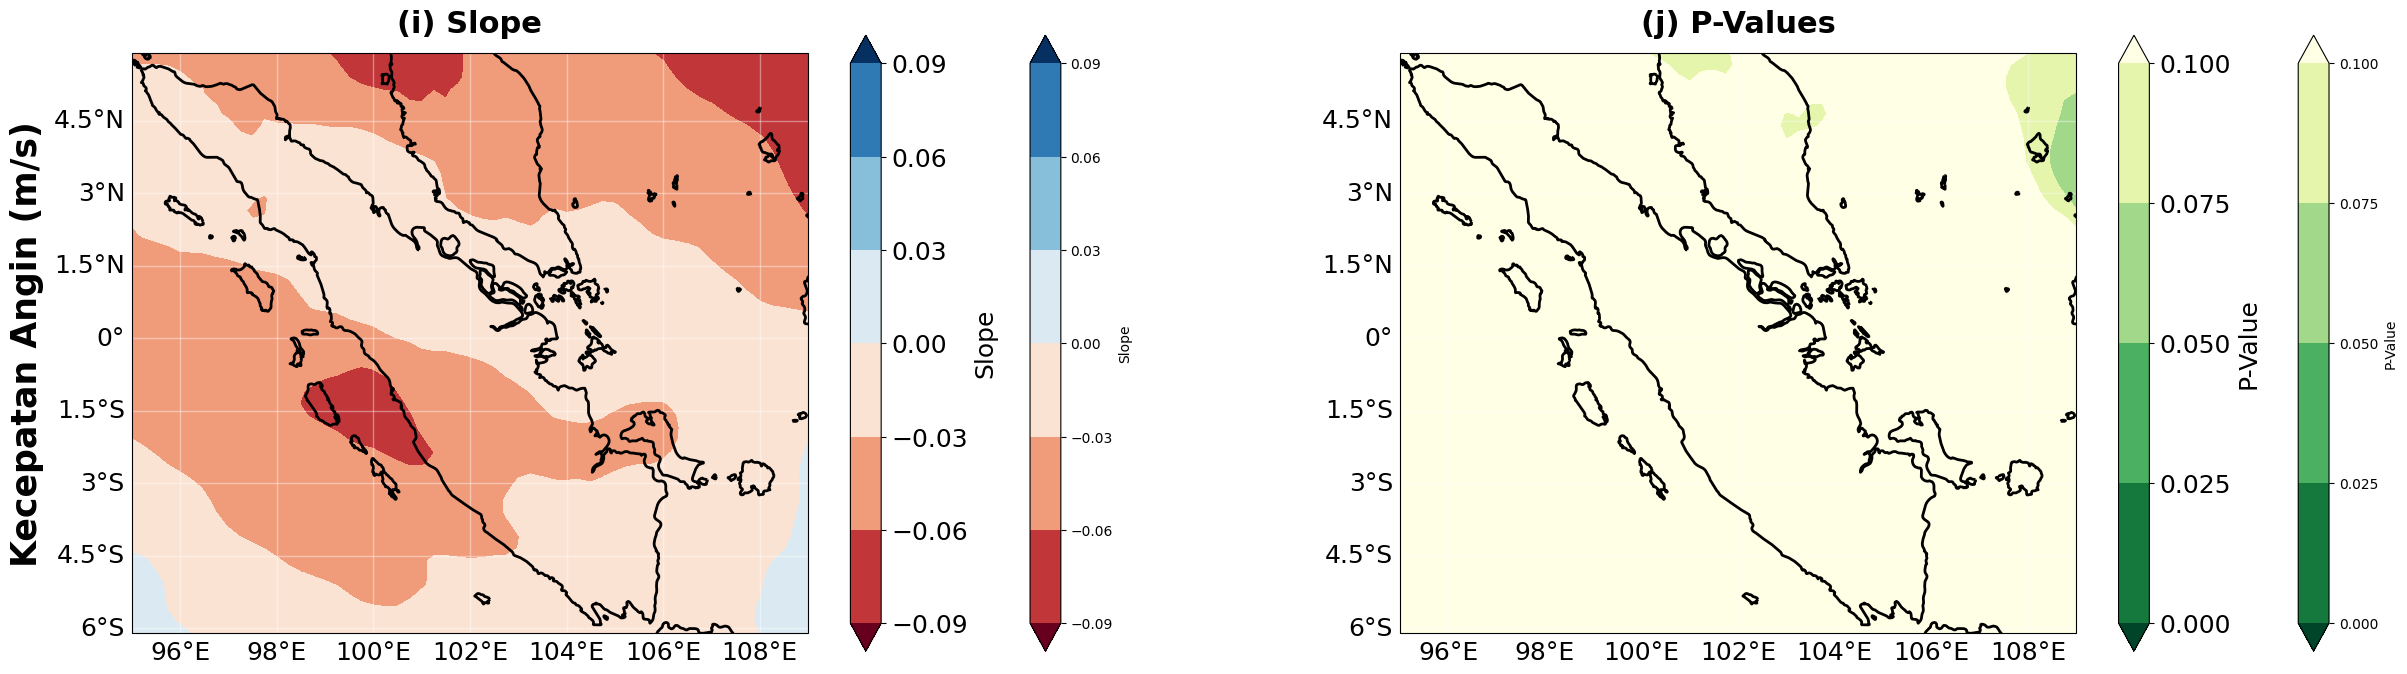

In [27]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(30,8), subplot_kw={'projection': ccrs.PlateCarree()})
# ax.coastlines('10m', linewidth=2, zorder=100)

mean_slope_ws = result_ws.slope.plot.contourf(ax=ax1,
            transform=ccrs.PlateCarree(),
            cmap='RdBu',
            extend='both',
            cbar_kwargs={'label': 'Slope'})

mean_pvalue_ws = result_ws.p_values.plot.contourf(ax=ax2,
            transform=ccrs.PlateCarree(),
            cmap='YlGn_r',
            extend='both',
            cbar_kwargs={'label': 'P-Value'},
            levels=np.linspace(0, 0.1, 5),  # Set levels from 0 to 0.1 with 11 levels
            vmin=0,  # Set vmin to 0
            vmax=0.1)  # Set vmax to 0.1)

# Add color bars
cbar1 = plt.colorbar(mean_slope_ws, ax=ax1)
cbar2 = plt.colorbar(mean_pvalue_ws, ax=ax2)

# Set the font size for color bars
cbar1.ax.tick_params(labelsize=18)
cbar2.ax.tick_params(labelsize=18)

# Set the font size for color bar labels
cbar1.set_label('Slope', fontsize=18)
cbar2.set_label('P-Value', fontsize=18)

# Add a title and axis labels
ax1.set_title('(i) Slope', size=22, pad=15, fontweight='bold')
ax2.set_title('(j) P-Values', size=22, pad=15, fontweight='bold')

# Tambahkan label Kindex pada sumbu y
ax1.annotate('Kecepatan Angin (m/s)', xy=(-0.18, 0.5), xycoords='axes fraction',
             rotation=90, va='center', fontsize=25, fontweight='bold')


# Add coastlines and gridlines
for ax in [ax1, ax2]:
    ax.coastlines('10m', lw=2, color='k', zorder=100)
    ax.add_feature(cftr.LAND,facecolor='white', zorder=0)

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='white',alpha=0.4)
    gl.top_labels = False
    gl.right_labels = False

    gl.ylocator = LatitudeLocator()
    gl.xformatter = LongitudeFormatter()
    gl.yformatter = LatitudeFormatter()

    gl.xlabel_style = {'size': 18, 'color': 'k'}#, 'rotation':45}
    gl.ylabel_style = {'color': 'k',  'size':18}

plt.show()

Low Level Wind Shear

In [28]:
# Compute the mean value of the filtered data for each year
mean_data_lls = lls_data.groupby('time.year').mean(dim='time')
mean_data_lls

<xarray.DataArray (year: 11, latitude: 49, longitude: 57)>
array([[[3.6980238, 3.5121984, 3.632804 , ..., 3.683385 , 3.6519043,
         3.6404963],
        [4.007546 , 3.92672  , 4.252703 , ..., 3.619893 , 3.5959191,
         3.582311 ],
        [4.3124046, 4.4764304, 4.5276675, ..., 3.564021 , 3.551907 ,
         3.5352035],
        ...,
        [2.925761 , 2.9294667, 2.93288  , ..., 3.4485574, 3.451436 ,
         3.446495 ],
        [2.886177 , 2.8918183, 2.89849  , ..., 3.61925  , 3.6067848,
         3.561217 ],
        [2.8480608, 2.8584526, 2.8721116, ..., 3.8459003, 3.8147001,
         3.7297137]],

       [[3.6736724, 3.4362903, 3.5630617, ..., 3.776364 , 3.7452075,
         3.7333975],
        [4.007654 , 3.859561 , 4.14477  , ..., 3.7264042, 3.707125 ,
         3.6989691],
        [4.357377 , 4.4520955, 4.4269953, ..., 3.6778376, 3.6767058,
         3.671483 ],
...
        [3.0687332, 3.079819 , 3.0843985, ..., 3.4784768, 3.5055308,
         3.5253937],
        [3.077572 , 3.091155 , 3.091701 , ..., 3.5961394, 3.643412 ,
         3.6552403],
        [3.0895875, 3.1060445, 3.1080372, ..., 3.7149084, 3.806876 ,
         3.8228228]],

       [[4.191188 , 3.8750076, 3.859205 , ..., 3.7646694, 3.7426548,
         3.7391777],
        [4.551122 , 4.25415  , 4.4158635, ..., 3.7466497, 3.7324288,
         3.7267935],
        [4.782769 , 4.759436 , 4.759066 , ..., 3.72939  , 3.7263663,
         3.7183192],
        ...,
        [3.1773036, 3.1920254, 3.2003071, ..., 3.2699442, 3.2753918,
         3.2874315],
        [3.1461697, 3.1606498, 3.169746 , ..., 3.3344228, 3.3372273,
         3.3497238],
        [3.1115887, 3.1261973, 3.1376786, ..., 3.445902 , 3.4534404,
         3.4595635]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 95.0 95.25 95.5 95.75 ... 108.5 108.8 109.0
  * latitude   (latitude) float32 5.9 5.65 5.4 5.15 ... -5.35 -5.6 -5.85 -6.1
  * year       (year) int64 2011 2012 2013 2014 2015 ... 2018 2019 2020 2021

In [29]:
# get latitudes and longitudes
lats = mean_data_lls.latitude.values
lons = mean_data_lls.longitude.values

# Create an empty array with the desired shape
slope_lls_arr = np.zeros(shape=(len(lats), len(lons)))
slope_lls_arr[:]=np.nan

# Create the DataArray object with the array and coordinates
slope_lls = xr.DataArray(slope_lls_arr,
                          dims=['latitude', 'longitude'],
                          coords={'latitude': lats, 'longitude': lons})

# Create an empty array with the desired shape
p_values_arr = np.zeros(shape=(len(lats), len(lons)))
p_values_arr[:]=np.nan

# Create the DataArray object with the array and coordinates
p_values_lls = xr.DataArray(p_values_arr,
                          dims=['latitude', 'longitude'],
                          coords={'latitude': lats, 'longitude': lons})

In [30]:
from scipy.stats import linregress

for i in range (0,lats.size):
    for j in range (0,lons.size):
        y = mean_data_lls[:, i, j].values
        x = range(len(y))
        li=linregress(x, y)
        slope_lls[i, j]=li.slope
        p_values_lls[i, j]=li.pvalue

# # create new xarray dataset for slope and p-values
result_lls = xr.Dataset({
    'slope': slope_lls,
    'p_values': p_values_lls})

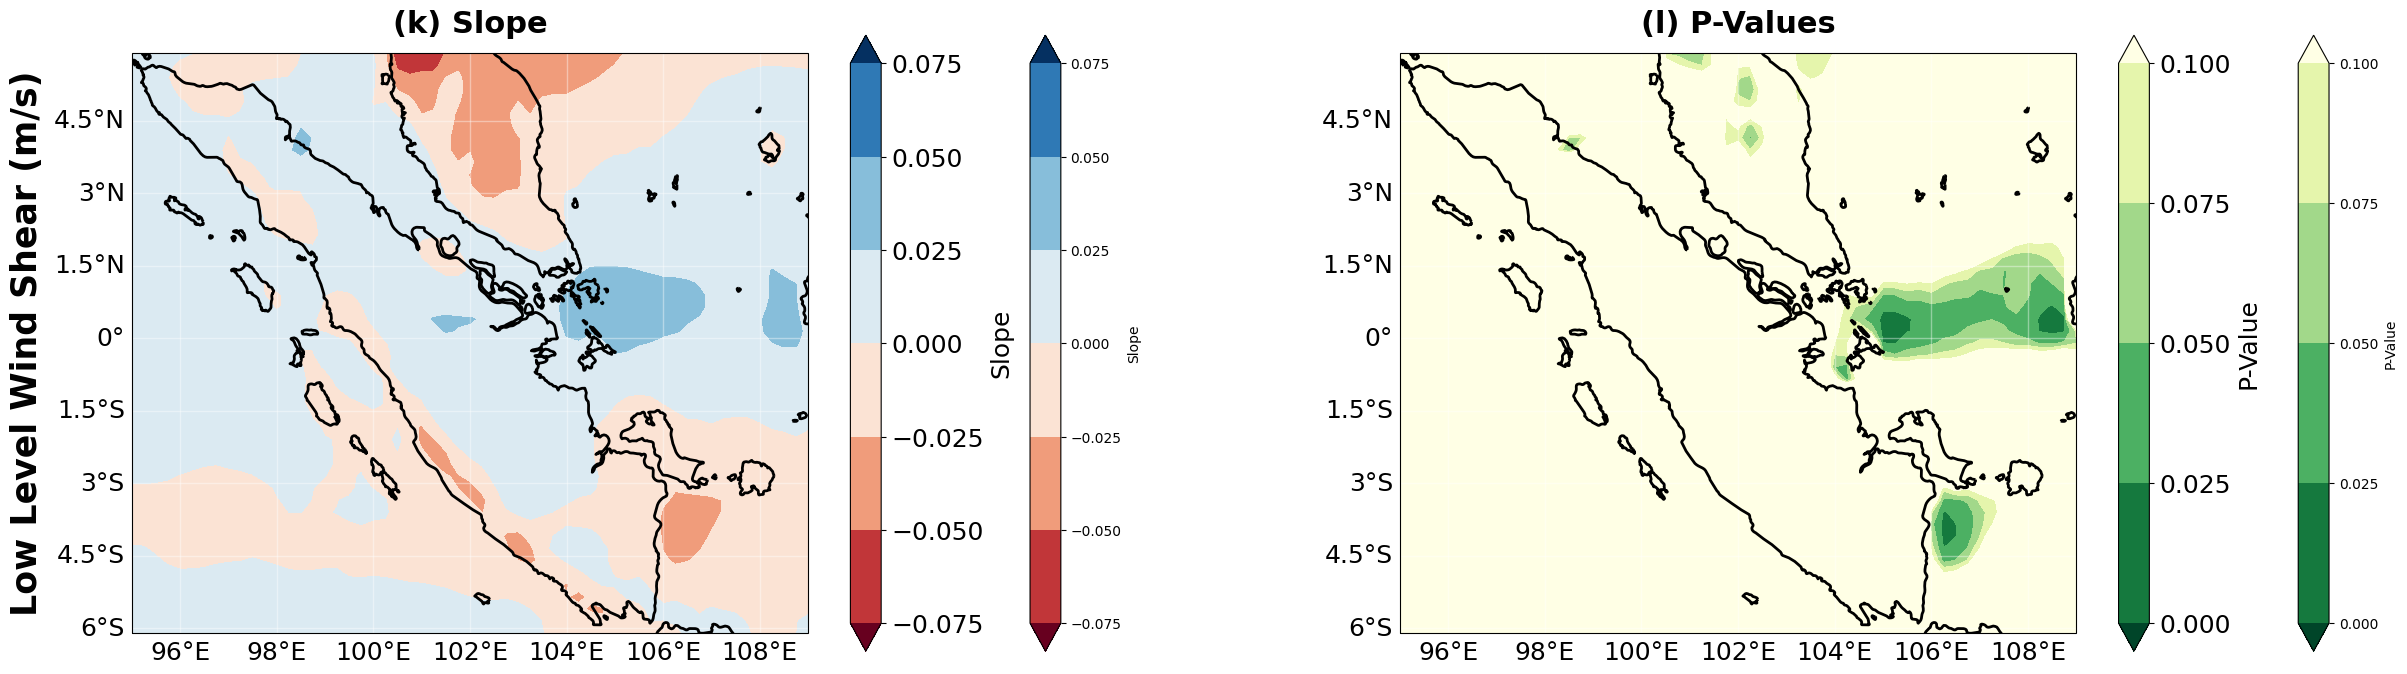

In [31]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(30,8), subplot_kw={'projection': ccrs.PlateCarree()})
# ax.coastlines('10m', linewidth=2, zorder=100)

mean_slope_lls = result_lls.slope.plot.contourf(ax=ax1,
            transform=ccrs.PlateCarree(),
            cmap='RdBu',
            extend='both',
            cbar_kwargs={'label': 'Slope'})

mean_pvalue_lls = result_lls.p_values.plot.contourf(ax=ax2,
            transform=ccrs.PlateCarree(),
            cmap='YlGn_r',
            extend='both',
            cbar_kwargs={'label': 'P-Value'},
            levels=np.linspace(0, 0.1, 5),  # Set levels from 0 to 0.1 with 11 levels
            vmin=0,  # Set vmin to 0
            vmax=0.1)  # Set vmax to 0.1)

# Add color bars
cbar1 = plt.colorbar(mean_slope_lls, ax=ax1)
cbar2 = plt.colorbar(mean_pvalue_lls, ax=ax2)

# Set the font size for color bars
cbar1.ax.tick_params(labelsize=18)
cbar2.ax.tick_params(labelsize=18)

# Set the font size for color bar labels
cbar1.set_label('Slope', fontsize=18)
cbar2.set_label('P-Value', fontsize=18)

# Add a title and axis labels
ax1.set_title('(k) Slope', size=22, pad=15, fontweight='bold')
ax2.set_title('(l) P-Values', size=22, pad=15, fontweight='bold')

# Tambahkan label Kindex pada sumbu y
ax1.annotate('Low Level Wind Shear (m/s)', xy=(-0.18, 0.5), xycoords='axes fraction',
             rotation=90, va='center', fontsize=25, fontweight='bold')

# Add coastlines and gridlines
for ax in [ax1, ax2]:
    ax.coastlines('10m', lw=2, color='k', zorder=100)
    ax.add_feature(cftr.LAND,facecolor='white', zorder=0)

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='white',alpha=0.4)
    gl.top_labels = False
    gl.right_labels = False

    gl.ylocator = LatitudeLocator()
    gl.xformatter = LongitudeFormatter()
    gl.yformatter = LatitudeFormatter()

    gl.xlabel_style = {'size': 18, 'color': 'k'}#, 'rotation':45}
    gl.ylabel_style = {'color': 'k',  'size':18}

plt.show()

DLS

In [32]:
# Compute the mean value of the filtered data for each year
mean_data_dls = dls_data.groupby('time.year').mean(dim='time')
mean_data_dls

<xarray.DataArray (year: 11, latitude: 49, longitude: 57)>
array([[[6.3454223, 5.9947147, 5.588695 , ..., 6.852713 , 6.8114758,
         6.7723475],
        [6.369861 , 5.5828934, 5.17232  , ..., 6.7722006, 6.730406 ,
         6.690251 ],
        [6.4030595, 5.5645847, 5.310245 , ..., 6.6973543, 6.657984 ,
         6.6233716],
        ...,
        [5.991149 , 5.9978113, 6.000962 , ..., 5.647564 , 5.6283445,
         5.575065 ],
        [6.006744 , 6.0129924, 6.0257163, ..., 5.672133 , 5.700961 ,
         5.618545 ],
        [6.01656  , 6.0241084, 6.0340085, ..., 5.6259336, 5.7535787,
         5.6647305]],

       [[6.773322 , 6.420215 , 6.0228577, ..., 6.453588 , 6.476934 ,
         6.487051 ],
        [6.8230762, 6.0038614, 5.5742097, ..., 6.406399 , 6.4193273,
         6.4274855],
        [6.7925067, 5.8523116, 5.5511093, ..., 6.3541045, 6.359781 ,
         6.369679 ],
...
        [5.793719 , 5.7709675, 5.74736  , ..., 5.2934623, 5.2967744,
         5.289658 ],
        [5.803658 , 5.784291 , 5.766765 , ..., 5.338208 , 5.382513 ,
         5.367344 ],
        [5.8157268, 5.807953 , 5.7999525, ..., 5.3551393, 5.507166 ,
         5.514569 ]],

       [[6.950098 , 6.5996766, 6.2018557, ..., 7.182225 , 7.2080774,
         7.238788 ],
        [6.8132753, 5.9868593, 5.6345353, ..., 7.147722 , 7.175487 ,
         7.207659 ],
        [6.6035304, 5.703794 , 5.562516 , ..., 7.104922 , 7.1359105,
         7.166502 ],
        ...,
        [5.8370895, 5.830383 , 5.8355746, ..., 5.7592883, 5.768063 ,
         5.746559 ],
        [5.7987604, 5.792775 , 5.8070517, ..., 5.719638 , 5.765874 ,
         5.7467337],
        [5.78785  , 5.7842946, 5.7979584, ..., 5.6248364, 5.755505 ,
         5.7668114]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 95.0 95.25 95.5 95.75 ... 108.5 108.8 109.0
  * latitude   (latitude) float32 5.9 5.65 5.4 5.15 ... -5.35 -5.6 -5.85 -6.1
  * year       (year) int64 2011 2012 2013 2014 2015 ... 2018 2019 2020 2021

In [33]:
# get latitudes and longitudes
lats = mean_data_dls.latitude.values
lons = mean_data_dls.longitude.values

# Create an empty array with the desired shape
slope_dls_arr = np.zeros(shape=(len(lats), len(lons)))
slope_dls_arr[:]=np.nan

# Create the DataArray object with the array and coordinates
slope_dls = xr.DataArray(slope_dls_arr,
                          dims=['latitude', 'longitude'],
                          coords={'latitude': lats, 'longitude': lons})

# Create an empty array with the desired shape
p_values_arr = np.zeros(shape=(len(lats), len(lons)))
p_values_arr[:]=np.nan

# Create the DataArray object with the array and coordinates
p_values_dls = xr.DataArray(p_values_arr,
                          dims=['latitude', 'longitude'],
                          coords={'latitude': lats, 'longitude': lons})

In [34]:
from scipy.stats import linregress

for i in range (0,lats.size):
    for j in range (0,lons.size):
        y = mean_data_dls[:, i, j].values
        x = range(len(y))
        li=linregress(x, y)
        slope_dls[i, j]=li.slope
        p_values_dls[i, j]=li.pvalue

# # create new xarray dataset for slope and p-values
result_dls = xr.Dataset({
    'slope': slope_dls,
    'p_values': p_values_dls})

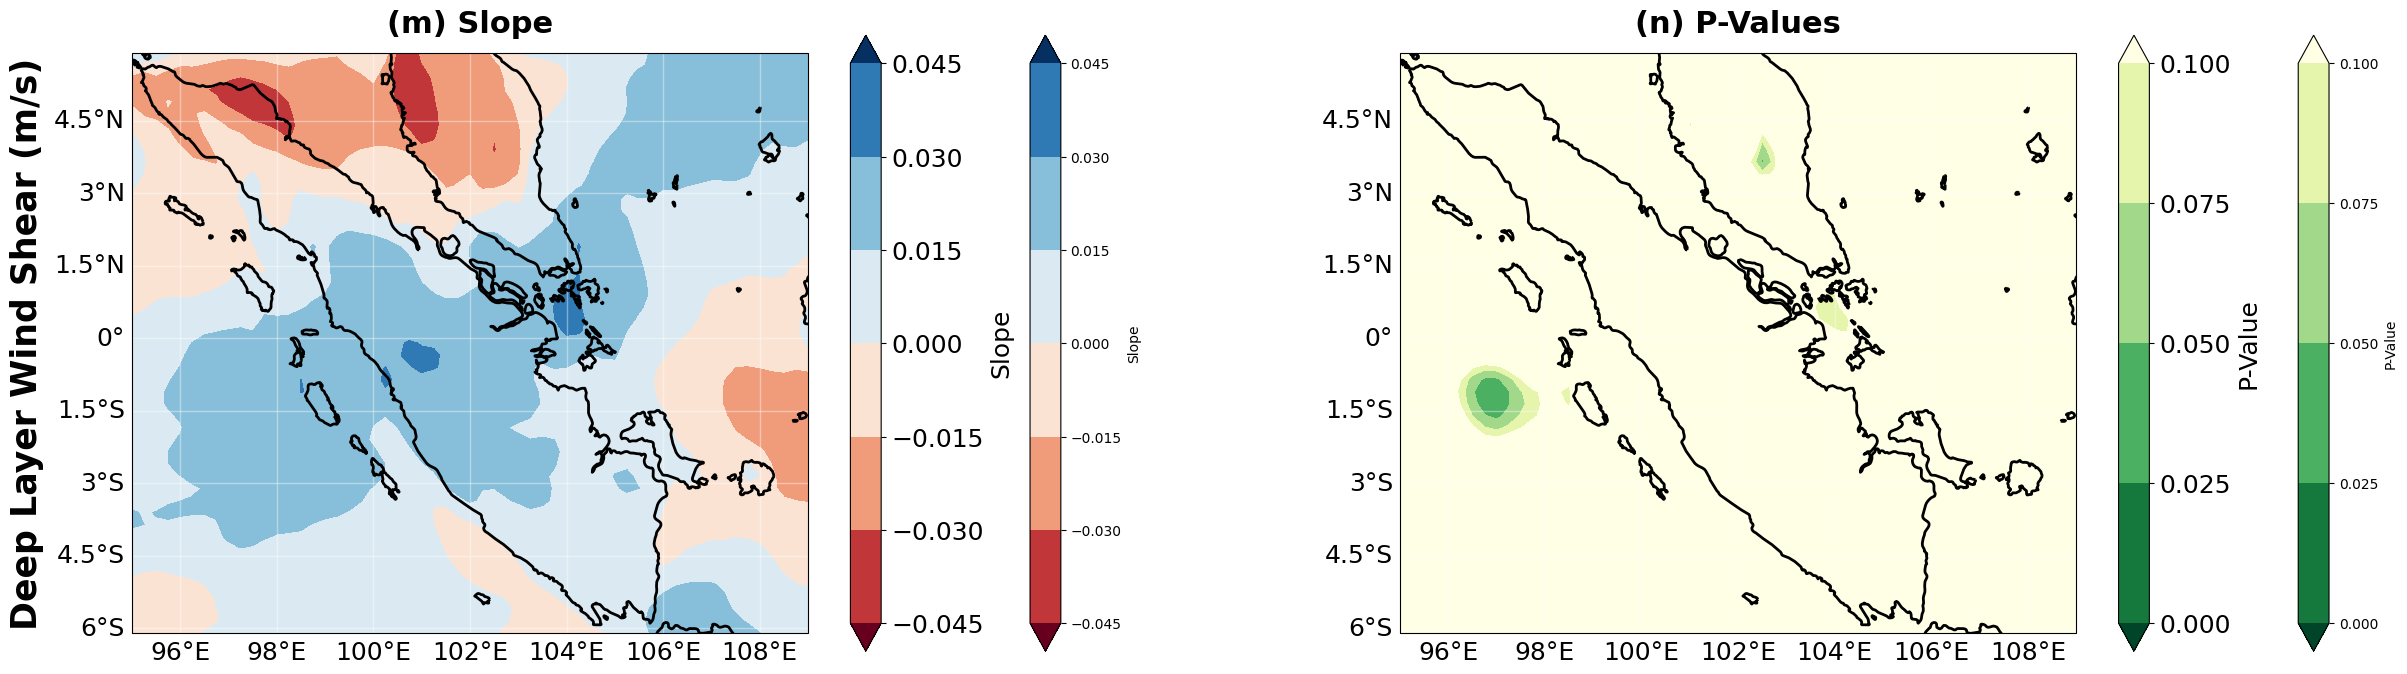

In [35]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(30,8), subplot_kw={'projection': ccrs.PlateCarree()})
# ax.coastlines('10m', linewidth=2, zorder=100)

mean_slope_dls = result_dls.slope.plot.contourf(ax=ax1,
            transform=ccrs.PlateCarree(),
            cmap='RdBu',
            extend='both',
            cbar_kwargs={'label': 'Slope'})

mean_pvalue_dls = result_dls.p_values.plot.contourf(ax=ax2,
            transform=ccrs.PlateCarree(),
            cmap='YlGn_r',
            extend='both',
            cbar_kwargs={'label': 'P-Value'},
            levels=np.linspace(0, 0.1, 5),  # Set levels from 0 to 0.1 with 11 levels
            vmin=0,  # Set vmin to 0
            vmax=0.1)  # Set vmax to 0.1)

# Add color bars
cbar1 = plt.colorbar(mean_slope_dls, ax=ax1)
cbar2 = plt.colorbar(mean_pvalue_dls, ax=ax2)

# Set the font size for color bars
cbar1.ax.tick_params(labelsize=18)
cbar2.ax.tick_params(labelsize=18)

# Set the font size for color bar labels
cbar1.set_label('Slope', fontsize=18)
cbar2.set_label('P-Value', fontsize=18)

# Add a title and axis labels
ax1.set_title('(m) Slope', size=22, pad=15, fontweight='bold')
ax2.set_title('(n) P-Values', size=22, pad=15, fontweight='bold')

# Tambahkan label Kindex pada sumbu y
ax1.annotate('Deep Layer Wind Shear (m/s)', xy=(-0.18, 0.5), xycoords='axes fraction',
             rotation=90, va='center', fontsize=25, fontweight='bold')

# Add coastlines and gridlines
for ax in [ax1, ax2]:
    ax.coastlines('10m', lw=2, color='k', zorder=100)
    ax.add_feature(cftr.LAND,facecolor='white', zorder=0)

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='white',alpha=0.4)
    gl.top_labels = False
    gl.right_labels = False

    gl.ylocator = LatitudeLocator()
    gl.xformatter = LongitudeFormatter()
    gl.yformatter = LatitudeFormatter()

    gl.xlabel_style = {'size': 18, 'color': 'k'}#, 'rotation':45}
    gl.ylabel_style = {'color': 'k',  'size':18}

plt.show()